Análise de dados do banco SSI

In [3]:
import sqlalchemy as sa
import pandas as pd 
import matplotlib.pyplot as plt



In [ ]:
server_name = "SERVER"#your server address
database_name = "DATA_BASE"
driver = "SQL Server Native Client 11.0"

connection_string = f"mssql+pyodbc://@{server_name}/{database_name}?driver={driver}"
engine = sa.create_engine(connection_string)

query = "SELECT * FROM dbo.YOUR_TB"

df = pd.read_sql(query, engine)

display(df)

Informações Básicas:

In [ ]:
display(df.info())

In [ ]:
display((df.isnull().sum()))

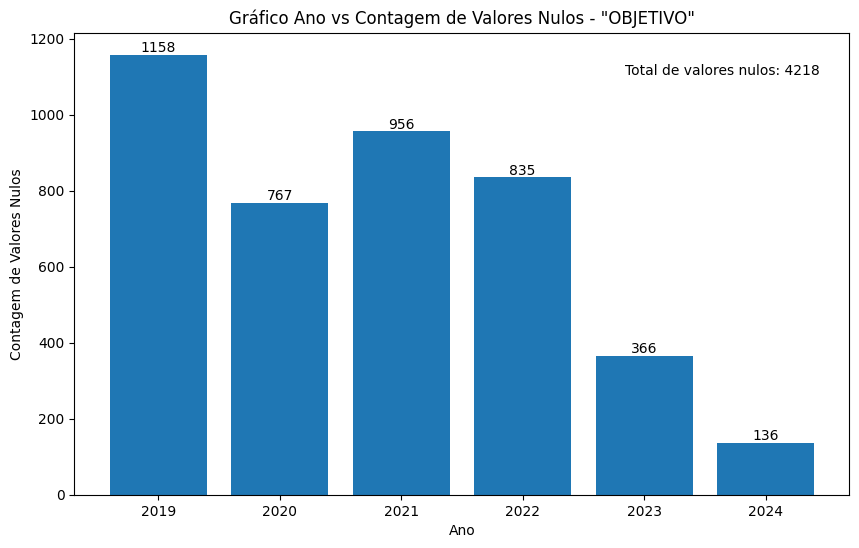

In [11]:
null_counts = df[df['OBJETIVO'].isnull()]['ANO'].value_counts().sort_index()
total_nulls = null_counts.sum()
# Plotando o gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(null_counts.index, null_counts.values)
plt.xlabel('Ano')
plt.ylabel('Contagem de Valores Nulos')
plt.title('Gráfico Ano vs Contagem de Valores Nulos - "OBJETIVO"')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.figtext(0.87, 0.81, 'Total de valores nulos: {}'.format(total_nulls), horizontalalignment='right')
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from collections import Counter

frases = df['OBJETIVO']

palavras = []
for frase in frases:
    if frase is not None:  # Adiciona uma verificação para None
        palavras.extend(word_tokenize(frase))

# Conta a frequência de cada palavra
contador = Counter(palavras)

# Exibe as palavras mais comuns
display(contador.most_common())